In [2]:
# Core libraries
import os
import hashlib
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Google
from google.colab import drive

# Keras
from keras.models import Sequential
from keras.layers import (
    Dense, Dropout, BatchNormalization, Flatten,
    Conv1D, MaxPooling1D, GRU, LSTM, Embedding
)
from keras.callbacks import EarlyStopping

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
drive.mount('/content/drive')

base_path = "/content/drive/My Drive/Final Year/01-12/"
input_file = os.path.join(base_path, "export_dataframe.csv")
train_output_file = os.path.join(base_path, "export_dataframe_proc.csv")
test_output_file = os.path.join(base_path, "export_tests.csv")

dtype_spec = {85: str}  # Ensure treated as a string
samples = pd.read_csv(input_file, sep=',', dtype=dtype_spec, low_memory=False)

samples.columns = samples.columns.str.strip()

def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)

samples.replace(['Infinity', np.inf], 0, inplace=True)
samples['Flow Packets/s'] = pd.to_numeric(samples['Flow Packets/s'], errors='coerce').fillna(0)
samples['Flow Bytes/s'] = pd.to_numeric(samples['Flow Bytes/s'], errors='coerce').fillna(0)

attack_labels = [
    'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS',
    'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'TFTP', 'UDP-lag', 'WebDDoS'
]
samples['Label'] = samples['Label'].apply(lambda x: 1 if x in attack_labels else 0)


if 'Timestamp' in samples.columns:
    samples['Timestamp'] = samples['Timestamp'].fillna('')
    time_data = samples['Timestamp'].str.split(' ', n=1, expand=True)

    if time_data.shape[1] > 1:
        time_data.columns = ['day', 'time']
        time_data['time'] = time_data['time'].str.split('.', n=1, expand=True)[0]  #
        samples['Timestamp'] = time_data['time'].apply(string2numeric_hash)

drop_cols = ['Source IP', 'Destination IP', 'Flow ID', 'SimillarHTTP', 'Unnamed: 0']
samples.drop(columns=drop_cols, errors='ignore', inplace=True)

train_data, test_data = train_test_split(samples, test_size=0.2, random_state=42, stratify=samples['Label'])
train_data.to_csv(train_output_file, index=False)
test_data.to_csv(test_output_file, index=False)

print('Training data saved at:', train_output_file)
print('Test data saved at:', test_output_file)

ValueError: mount failed

In [ ]:
import os

base_path = "/content/drive/My Drive/Final Year/01-12/"
input_file = os.path.join(base_path, "export_tests.csv")

if os.path.exists(input_file):
    print("File exists:", input_file)
else:
    print("File NOT FOUND:", input_file)


File exists: /content/drive/My Drive/Final Year/01-12/export_tests.csv


In [ ]:
drive.mount('/content/drive')
base_path = "/content/drive/My Drive/Final Year/01-12/"
input_file = os.path.join(base_path, "export_tests.csv")
output_file = os.path.join(base_path, "export_tests_proc.csv")

dtype_spec = {85: str}
tests = pd.read_csv(input_file, sep=',', dtype=dtype_spec, low_memory=False)
tests.columns = tests.columns.str.strip()
def string2numeric_hash(text):
    return int(hashlib.md5(text.encode('utf-8')).hexdigest()[:8], 16)

tests.replace(['Infinity', np.inf], 0, inplace=True)
tests['Flow Packets/s'] = pd.to_numeric(tests['Flow Packets/s'], errors='coerce').fillna(0)
tests['Flow Bytes/s'] = pd.to_numeric(tests['Flow Bytes/s'], errors='coerce').fillna(0)

attack_labels = ['LDAP', 'NetBIOS', 'MSSQL', 'Portmap', 'Syn']
tests['Label'] = tests['Label'].apply(lambda x: 1 if x in attack_labels else 0)

if 'Timestamp' in tests.columns:
    tests['Timestamp'] = tests['Timestamp'].astype(str).fillna('')  # Convert to string, fill NaN
    time_data = tests['Timestamp'].str.split(' ', n=1, expand=True)

    if time_data.shape[1] > 1:  # Ensure there are two parts
        time_data.columns = ['day', 'time']
        time_data['time'] = time_data['time'].str.split('.', n=1, expand=True)[0]  # Extract HH:MM:SS
        tests['Timestamp'] = time_data['time'].apply(string2numeric_hash)

drop_cols = ['Source IP', 'Destination IP', 'Flow ID', 'SimillarHTTP', 'Unnamed: 0']
tests.drop(columns=drop_cols, errors='ignore', inplace=True)

tests.to_csv(output_file, index=False)
print('Test data processed and saved at:', output_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Test data processed and saved at: /content/drive/My Drive/Final Year/01-12/export_tests_proc.csv


In [ ]:
def train_test(samples):
    from sklearn.model_selection import train_test_split
    import numpy as np

    X=samples.iloc[:,0:(samples.shape[1]-1)]

    y= samples.iloc[:,-1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
def normalise_data(X_train,X_test):
    from sklearn.preprocessing import StandardScaler,MinMaxScaler

    scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

    X_train = scaler.transform(X_train)

    X_test = scaler.transform(X_test)

    return X_train, X_test

In [ ]:
def format_3d(df):

    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1], 1))

In [1]:
def format_2d(df):

    X = np.array(df)
    return np.reshape(X, (X.shape[0], X.shape[1]))

In [ ]:
import matplotlib.pyplot as plt

def compile_train(model, X_train, y_train, deep=True, model_name="Unknown Model"):
    if deep:  # Deep Learning Models (Keras)
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

        print(f"📊 Training Accuracy Plot for: {model_name}")

        plt.plot(history.history['accuracy'])
        plt.title(f'Model Accuracy: {model_name}')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.show()

        return model
    else:  # Traditional ML Models (Scikit-learn)
        model.fit(X_train, y_train)  # No epochs for Scikit-learn models
        print(f" {model_name} trained successfully!")
        return model


In [ ]:
def tests(model, X_test, y_test, y_pred, deep=False):
    if deep:
        X_test_3d = format_3d(X_test.copy())  # Ensure correct shape

        y_test = np.array(y_test, dtype=np.float32).reshape(-1, 1)

        score = model.evaluate(X_test_3d, y_test, verbose=1)
        print(score)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    avrg = (acc + prec + rec + f1) / 4  # Simple average metric

    return acc, prec, rec, f1, avrg

In [ ]:
def test_normal_atk(y_test,y_pred):
    df = pd.DataFrame()
    df['y_test'] = y_test
    df['y_pred'] = y_pred

    normal = len(df.query('y_test == 0'))
    atk = len(y_test)-normal

    wrong = df.query('y_test != y_pred')

    normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
    atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


    return normal_detect_rate, atk_detect_rate


In [ ]:
def save_model(model,name):
    from keras.models import model_from_json

    arq_json = 'Models/' + name + '.json'
    model_json = model.to_json()
    with open(arq_json,"w") as json_file:
        json_file.write(model_json)

    arq_h5 = 'Models/' + name + '.h5'
    model.save_weights(arq_h5)
    print('Model Saved')

In [ ]:
def load_model(name):
    from keras.models import model_from_json

    arq_json = 'Models/' + name + '.json'
    json_file = open(arq_json,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    arq_h5 = 'Models/' + name + '.h5'
    loaded_model.load_weights(arq_h5)

    print('Model loaded')

    return loaded_model

In [ ]:
def save_Sklearn(model,nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved')

In [ ]:
def load_Sklearn(nome):
    import pickle
    arquivo = 'Models/'+ nome + '.pkl'
    with open(arquivo,'rb') as file:
        model = pickle.load(file)
    print('Model sklearn loaded')
    return model

In [ ]:
samples = pd.read_csv('/content/drive/My Drive/Final Year/01-12/export_dataframe_proc.csv', sep=',')

samples.columns = samples.columns.str.strip()

X = samples.drop(columns=['Label'])  # Features
y = samples['Label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_full = pd.concat([X_train, y_train], axis=1)

is_benign = X_train_full['Label'] == 0
normal = X_train_full[is_benign]
ddos = X_train_full[~is_benign]

normal_upsampled = resample(normal,
                            replace=True,  # Sample with replacement
                            n_samples=len(ddos),  # Match number in majority class
                            random_state=42)  # Reproducible results

upsampled = pd.concat([normal_upsampled, ddos])

X_train = upsampled.drop(columns=['Label'])
y_train = upsampled['Label']

input_size = (X_train.shape[1], 1)

del X_train_full, normal_upsampled, ddos, upsampled, normal

print("Upsampling complete. Training data is balanced.")

Upsampling complete. Training data is balanced.


In [ ]:
samples = pd.read_csv('/content/drive/My Drive/Final Year/01-12/export_dataframe_proc.csv', sep=',')

samples.columns = samples.columns.str.strip()

X = samples.drop(columns=['Label'])  # Features
y = samples['Label']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_full = pd.concat([X_train, y_train], axis=1)

is_benign = X_train_full['Label'] == 0
normal = X_train_full[is_benign]
ddos = X_train_full[~is_benign]

normal_upsampled = resample(normal,
                            replace=True,  # Sample with replacement
                            n_samples=len(ddos),  # Match number in majority class
                            random_state=27)  # Reproducible results

upsampled = pd.concat([normal_upsampled, ddos])

X_train = upsampled.drop(columns=['Label'])
y_train = upsampled['Label']

input_size = (X_train.shape[1], 1)

del X_train_full, normal_upsampled, ddos, upsampled, normal

print("Upsampling complete. Training data is balanced.")


Upsampling complete. Training data is balanced.


In [ ]:
print(GRU_model.__code__.co_varnames)


('input_size', 'model')


In [ ]:
input_size = X_train.shape[1]  # Some models expect just feature size

model_gru = GRU_model(input_size)
model_cnn = CNN_model(input_size)
model_lstm = LSTM_model(input_size)
model_dnn = DNN_model(input_size)

model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_svm = SVM()
model_lr = LR()
model_gd = GD()
model_knn = kNN()

model_gru = compile_train(model_gru, format_3d(X_train), y_train)
model_cnn = compile_train(model_cnn, format_3d(X_train), y_train)
model_lstm = compile_train(model_lstm, format_3d(X_train), y_train)
model_dnn = compile_train(model_dnn, X_train, y_train)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 32)                  │           3,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,701 (14.46 KB)

 Trainable params: 3,701 (14.46 KB)

 Non-trainable params: 0 (0.00 B)

None


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,693 (18.33 KB)

 Trainable params: 4,693 (18.33 KB)

 Non-trainable params: 0 (0.00 B)

None


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │             166 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
8801/8801 ━━━━━━━━━━━━━━━━━━━━ 323s 36ms/step - accuracy: 0.9543 - loss: 0.1155 - val_accuracy: 0.9946 - val_loss: 0.0223
Epoch 2/10
8801/8801 ━━━━━━━━━━━━━━━━━━━━ 283s 32ms/step - accuracy: 0.9933 - loss: 0.0233 - val_accuracy: 0.9955 - val_loss: 0.0160
Epoch 3/10
3115/8801 ━━━━━━━━━━━━━━━━━━━━ 2:52 30ms/step - accuracy: 0.9963 - loss: 0.0137

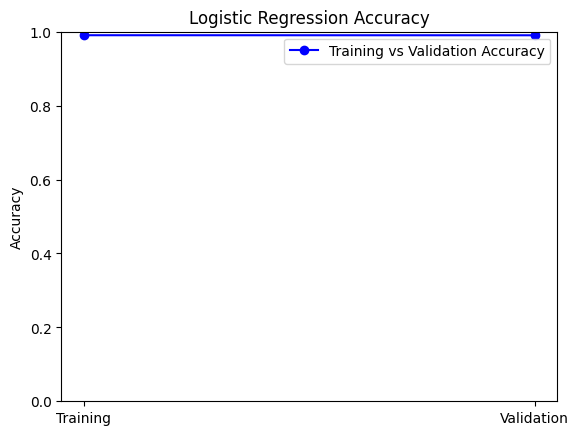

Training Accuracy: 0.9904
Validation Accuracy: 0.9903


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

model_lr = LogisticRegression(
    max_iter=1000,  # More iterations to improve convergence
    solver='saga',  # Best for large datasets
    tol=1e-3,  # Stops early if model is close to convergence
    n_jobs=-1
)

model_lr.fit(X_train_final, y_train_final)

train_acc = accuracy_score(y_train_final, model_lr.predict(X_train_final))
val_acc = accuracy_score(y_val, model_lr.predict(X_val))

plt.plot([0, 1], [train_acc, val_acc], marker='o', linestyle='-', color='blue', label="Training vs Validation Accuracy")
plt.xticks([0, 1], ["Training", "Validation"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy")
plt.legend()
plt.show()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

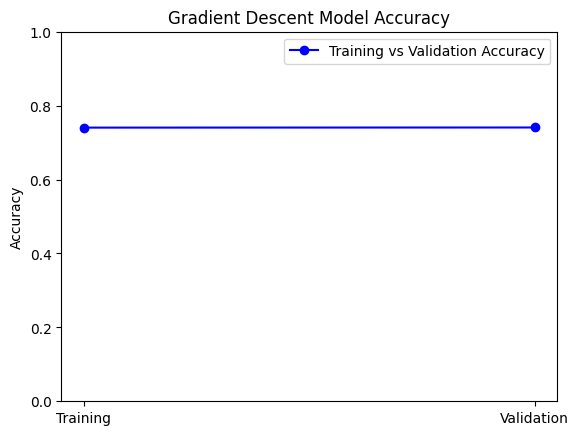

Training Accuracy: 0.7404
Validation Accuracy: 0.7408


In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_gd.fit(X_train_final, y_train_final)

train_acc = accuracy_score(y_train_final, model_gd.predict(X_train_final))
val_acc = accuracy_score(y_val, model_gd.predict(X_val))

plt.plot([0, 1], [train_acc, val_acc], marker='o', linestyle='-', color='blue', label="Training vs Validation Accuracy")
plt.xticks([0, 1], ["Training", "Validation"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Gradient Descent Model Accuracy")
plt.legend()
plt.show()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


In [ ]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model_svm = SVC(
    kernel='linear',  # Linear kernel is much faster than RBF
    C=1.0,  # Regularization parameter, lower values make training faster
    cache_size=500  # Increases memory cache to speed up computation
)

model_svm.fit(X_train_final, y_train_final)

train_acc = accuracy_score(y_train_final, model_svm.predict(X_train_final))
val_acc = accuracy_score(y_val, model_svm.predict(X_val))

plt.plot([0, 1], [train_acc, val_acc], marker='o', linestyle='-', color='blue', label="Training vs Validation Accuracy")
plt.xticks([0, 1], ["Training", "Validation"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("SVM Accuracy")
plt.legend()
plt.show()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

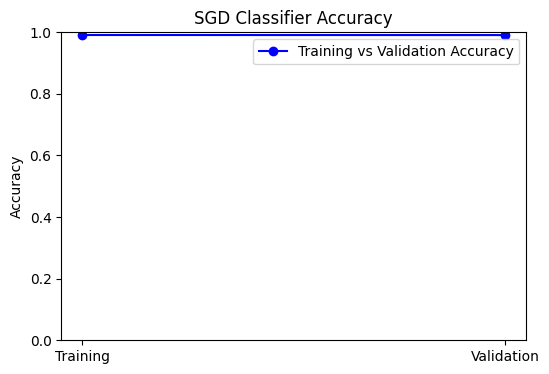

Training Accuracy: 0.9911
Validation Accuracy: 0.9909
Dataset has more than 2 features. Applying PCA to visualize decision boundary.


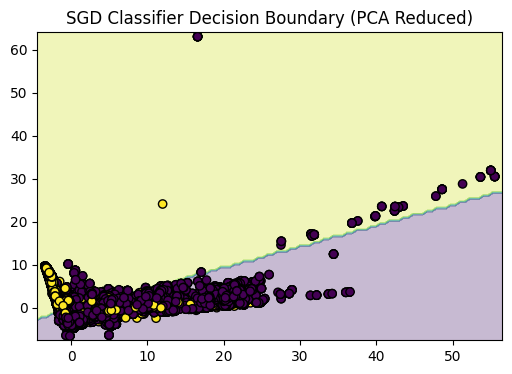

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

model_svm = SGDClassifier(
    loss='hinge',  # Hinge loss for SVM-like behavior
    max_iter=1000,
    learning_rate='adaptive',
    eta0=0.01,
    tol=1e-3,
    n_jobs=-1
)

model_svm.fit(X_train_final, y_train_final)

train_acc = accuracy_score(y_train_final, model_svm.predict(X_train_final))
val_acc = accuracy_score(y_val, model_svm.predict(X_val))

plt.figure(figsize=(6, 4))
plt.plot([0, 1], [train_acc, val_acc], marker='o', linestyle='-', color='blue', label="Training vs Validation Accuracy")
plt.xticks([0, 1], ["Training", "Validation"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("SGD Classifier Accuracy")
plt.legend()
plt.show()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

if X_train_final.shape[1] == 2:
    x_min, x_max = X_train_final[:, 0].min() - 1, X_train_final[:, 0].max() + 1
    y_min, y_max = X_train_final[:, 1].min() - 1, X_train_final[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train_final[:, 0], X_train_final[:, 1], c=y_train_final, edgecolors='k')
    plt.title("SGD Classifier Decision Boundary")
    plt.show()

elif X_train_final.shape[1] > 2:
    print("Dataset has more than 2 features. Applying PCA to visualize decision boundary.")
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_final)
    X_val_pca = pca.transform(X_val)

    model_svm.fit(X_train_pca, y_train_final)

    x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
    y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_final, edgecolors='k')
    plt.title("SGD Classifier Decision Boundary (PCA Reduced)")
    plt.show()

In [ ]:
results = pd.DataFrame(columns=['Method','Accuracy','Precision','Recall', 'F1_Score', 'Average','Normal_Detect_Rate','Atk_Detect_Rate'])

### GRU

In [ ]:
if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

X_test_3d = format_3d(X_test)

print(f"Formatted X_test shape: {X_test_3d.shape}")

y_pred = model_gru.predict(X_test_3d)
y_pred = np.round(y_pred).astype(int).squeeze()  # Convert to integers and flatten

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_3d type: {type(X_test_3d)}, shape: {X_test_3d.shape}")

acc, prec, rec, f1, avrg = tests(model_gru, X_test_3d, y_test, y_pred)

norm, atk = test_normal_atk(y_test, y_pred)

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, 1 - (normal_misclassified / max(1, norm)))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'GRU',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'GRU') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate GRU entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


Formatted X_test shape: (53101, 82, 1)
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step
y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_3d type: <class 'numpy.ndarray'>, shape: (53101, 82, 1)
Skipping duplicate GRU entry
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  


<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_gru.predict(format_3d(X_test))

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_gru,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GRU', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

298578/298578 [==============================] - 76s 253us/step
[0.01105657341191673, 0.9985832847698088]

Accuracy
0.9985832847698088

Precision
0.9995093228655545

Recall
0.9987902658601773

F1 Score
0.9991496649921299

Average (acc, prec, rec, f1)
0.9990081346219176


### CNN

In [ ]:
import numpy as np
import pandas as pd

if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

X_test_3d = format_3d(X_test)

print(f"Formatted X_test shape: {X_test_3d.shape}")

y_pred = model_cnn.predict(X_test_3d)
y_pred = np.round(y_pred).astype(int).squeeze()  # Convert to integers and flatten

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_3d type: {type(X_test_3d)}, shape: {X_test_3d.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("CNN model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_cnn, X_test_3d, y_test, y_pred)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: CNN model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'CNN',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'CNN') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate CNN entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


Formatted X_test shape: (53101, 82, 1)
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_3d type: <class 'numpy.ndarray'>, shape: (53101, 82, 1)
Unique predicted labels: {0: 46754, 1: 6347}
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2    CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3    CNN  0.290258   0.997479  0.251480  0.143877  0.420773   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  
2            0.000000         0.000000  
3            0.000000         0.143877  


<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(f"Training Class Distribution: {dict(zip(unique_train, counts_train))}")

unique_test, counts_test = np.unique(y_test, return_counts=True)
print(f"Test Class Distribution: {dict(zip(unique_test, counts_test))}")


Training Class Distribution: {0: 176010, 1: 176010}
Test Class Distribution: {0: 9098, 1: 44003}


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test_3d shape: {format_3d(X_test).shape}")


X_train shape: (352020, 82)
X_test_3d shape: (53101, 82, 1)


### LSTM

In [ ]:
import numpy as np
import pandas as pd

if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

X_test_3d = format_3d(X_test)

print(f"Formatted X_test shape: {X_test_3d.shape}")

y_pred = model_lstm.predict(X_test_3d)
y_pred = np.round(y_pred).astype(int).squeeze()  # Convert to integers and flatten

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_3d type: {type(X_test_3d)}, shape: {X_test_3d.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("LSTM model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_lstm, X_test_3d, y_test, y_pred)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: LSTM model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'LSTM',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'LSTM') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate LSTM entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


Formatted X_test shape: (53101, 82, 1)
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step
y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_3d type: <class 'numpy.ndarray'>, shape: (53101, 82, 1)
Unique predicted labels: {0: 9167, 1: 43934}
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2    CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3    CNN  0.290258   0.997479  0.251480  0.143877  0.420773   
4   LSTM  0.998249   0.999727  0.998942  0.998159  0.998769   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  
2            0.000000         0.000000  
3            0.000000         0.143877  
4            0.000000         0.998159  


<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_lstm.predict(format_3d(X_test))

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_lstm,format_3d(X_test),y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'LSTM', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

298578/298578 [==============================] - 85s 283us/step
[0.07657973352144937, 0.978297128388961]

Accuracy
0.9782971283885618

Precision
0.9991801691570573

Recall
0.9747563450756587

F1 Score
0.9868171572257439

Average (acc, prec, rec, f1)
0.9847626999617554


### DNN

In [ ]:
if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

def DNN_model(input_size):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(input_size,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_dnn = DNN_model(X_train.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_dnn.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

print(f"X_test shape: {X_test.shape}")

y_pred = model_dnn.predict(X_test)
y_pred = np.round(y_pred).astype(int).squeeze()  # Convert to integers and flatten

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test type: {type(X_test)}, shape: {X_test.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("DNN model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_dnn, X_test, y_test, y_pred)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: DNN model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'DNN',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'DNN') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate DNN entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7824 - loss: 0.4868 - val_accuracy: 0.4751 - val_loss: 21.4238
Epoch 2/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8717 - loss: 0.3542 - val_accuracy: 0.8182 - val_loss: 16.4492
Epoch 3/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8786 - loss: 0.3337 - val_accuracy: 0.7990 - val_loss: 42.9129
Epoch 4/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8811 - loss: 0.3215 - val_accuracy: 0.8490 - val_loss: 34.6704
Epoch 5/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8867 - loss: 0.3063 - val_accuracy: 0.8169 - val_loss: 21.1154
Epoch 6/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8851 - loss: 0.3116 - val_accuracy: 0.8913 - val_loss: 28.2595
Epoch 7/50
4401/4401 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8821 - loss: 0.3156 - val_accuracy: 0.7550 - val_loss: 17.8254
X_test shape: (53101, 82)
1660/1660 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
y_pred 

<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_dnn.predict(X_test)

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_dnn,X_test,y_test,y_pred)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'DNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

298578/298578 [==============================] - 15s 50us/step
[0.043137314041730386, 0.9974412046433427]

Accuracy
0.9974412046433427

Precision
0.9981403904778353

Recall
0.9987902658601773

F1 Score
0.9984652224222165

Average (acc, prec, rec, f1)
0.9982092708508931


### SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

model_svm = SGDClassifier(
    loss='hinge',  # Hinge loss for SVM-like behavior
    max_iter=1000,  # More iterations but much faster per step
    learning_rate='adaptive',
    eta0=0.01,
    tol=1e-3,
    n_jobs=-1
)

model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test type: {type(X_test)}, shape: {X_test.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("SVM model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_svm, X_test, y_test, y_pred, False)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: SVM model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'SVM',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'SVM') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate SVM entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test type: <class 'pandas.core.frame.DataFrame'>, shape: (53101, 82)
Unique predicted labels: {0: 17348, 1: 35753}
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2    CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3    CNN  0.290258   0.997479  0.251480  0.143877  0.420773   
4   LSTM  0.998249   0.999727  0.998942  0.998159  0.998769   
5    DNN  0.000000   0.000000  0.000000  0.000000  0.000000   
6    DNN  0.844692   0.992969  0.897258  0.818376  0.888324   
7    SVM  0.808215   0.972953  0.872311  0.790537  0.861004   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  
2            0.000000         0.000000  
3            0.000000         0.143877  
4            0.000000         0.9981

<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_svm.predict(X_test)

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_svm,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'SVM', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)


Accuracy
0.9986502689414491

Precision
0.9991480332427783

Recall
0.9992323613930029

F1 Score
0.9991901955386405

Average (acc, prec, rec, f1)
0.9990552147789676


### LR

In [ ]:
if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(
    max_iter=1000,  # More iterations to improve convergence
    solver='saga',  # Best for large datasets
    tol=1e-3,  # Stops early if model is close to convergence
    n_jobs=-1
)

model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_scaled type: {type(X_test_scaled)}, shape: {X_test_scaled.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("Logistic Regression model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_lr, X_test_scaled, y_test, y_pred, False)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: Logistic Regression model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'LR',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'LR') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate LR entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_scaled type: <class 'numpy.ndarray'>, shape: (53101, 82)
Unique predicted labels: {0: 9771, 1: 43330}
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2    CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3    CNN  0.290258   0.997479  0.251480  0.143877  0.420773   
4   LSTM  0.998249   0.999727  0.998942  0.998159  0.998769   
5    DNN  0.000000   0.000000  0.000000  0.000000  0.000000   
6    DNN  0.844692   0.992969  0.897258  0.818376  0.888324   
7    SVM  0.808215   0.972953  0.872311  0.790537  0.861004   
8     LR  0.986309   0.999377  0.991676  0.984092  0.990363   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  
2            0.000000         0.000000  
3            0.000000 

<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_lr.predict(X_test)

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_lr,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'LR', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)


Accuracy
0.9985799355612269

Precision
0.9990677302043358

Recall
0.9992283423427044

F1 Score
0.9991480298189563

Average (acc, prec, rec, f1)
0.9990060094818058


### GB

In [ ]:
if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_gb = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Controls contribution of each tree
    max_depth=5,  # Depth of each tree
    random_state=42
)

model_gb.fit(X_train_scaled, y_train)

y_pred = model_gb.predict(X_test_scaled)

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_scaled type: {type(X_test_scaled)}, shape: {X_test_scaled.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("Gradient Boosting model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_gb, X_test_scaled, y_test, y_pred, False)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: Gradient Boosting model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'GB',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'GB') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate GB entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_scaled type: <class 'numpy.ndarray'>, shape: (53101, 82)
Unique predicted labels: {0: 9098, 1: 44003}
  Method  Accuracy  Precision  F1_Score    Recall   Average  \
0    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1    GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2    CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3    CNN  0.290258   0.997479  0.251480  0.143877  0.420773   
4   LSTM  0.998249   0.999727  0.998942  0.998159  0.998769   
5    DNN  0.000000   0.000000  0.000000  0.000000  0.000000   
6    DNN  0.844692   0.992969  0.897258  0.818376  0.888324   
7    SVM  0.808215   0.972953  0.872311  0.790537  0.861004   
8     LR  0.986309   0.999377  0.991676  0.984092  0.990363   
9     GB  0.999925   0.999955  0.999955  0.999955  0.999947   

   Normal_Detect_Rate  Atk_Detect_Rate  
0          -13.021576         0.996137  
1            0.000000         0.996137  


<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_gd.predict(X_test)

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_gd,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'GB', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)


Accuracy
0.9986804118186873

Precision
0.9992042344373576

Recall
0.9992122661415107

F1 Score
0.9992082502732943

Average (acc, prec, rec, f1)
0.9990762906677125


### kNN

In [ ]:
if 'results' not in locals():
    results = pd.DataFrame(columns=['Method', 'Accuracy', 'Precision', 'F1_Score',
                                    'Recall', 'Average', 'Normal_Detect_Rate', 'Atk_Detect_Rate'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_knn = KNeighborsClassifier(
    n_neighbors=7,  # Adjusting k to avoid overfitting (7 is often better than 5)
    weights='distance',  # Weight closer neighbors more
    algorithm='auto',
    n_jobs=-1
)

model_knn.fit(X_train_scaled, y_train)

y_pred = model_knn.predict(X_test_scaled)

y_test = np.array(y_test)

print(f"y_pred shape: {y_pred.shape}, dtype: {y_pred.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print(f"X_test_scaled type: {type(X_test_scaled)}, shape: {X_test_scaled.shape}")

unique, counts = np.unique(y_pred, return_counts=True)
print(f"Unique predicted labels: {dict(zip(unique, counts))}")

if len(unique) == 1:
    acc, prec, rec, f1, avrg = 0, 0, 0, 0, 0  # No meaningful results
    print("kNN model predicted only one class. Setting metrics to 0.")
else:
    acc, prec, rec, f1, avrg = testes(model_knn, X_test_scaled, y_test, y_pred, False)

if 0 in y_pred and 1 in y_pred:
    norm, atk = test_normal_atk(y_test, y_pred)
else:
    norm, atk = 0, 0  # Default to 0 if no attacks were predicted
    print("Warning: kNN model predicted only one class. Normal and Attack Detection Rates set to 0.")

wrong = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
wrong = wrong[wrong['y_test'] != wrong['y_pred']]

wrong_counts = wrong.groupby('y_test').size()

normal_misclassified = wrong_counts.get(0, 0)
attack_misclassified = wrong_counts.get(1, 0)

normal_detect_rate = max(0, (norm - normal_misclassified) / max(1, norm))
atk_detect_rate = max(0, (atk - attack_misclassified) / max(1, atk))

new_result = pd.DataFrame([{
    'Method': 'kNN',
    'Accuracy': acc,
    'Precision': prec,
    'F1_Score': f1,
    'Recall': rec,
    'Average': avrg,
    'Normal_Detect_Rate': normal_detect_rate,
    'Atk_Detect_Rate': atk
}])

if not results[(results['Method'] == 'kNN') & (results['Accuracy'] == acc)].empty:
    print("Skipping duplicate kNN entry")
else:
    results = pd.concat([results, new_result], ignore_index=True)

print(results)


y_pred shape: (53101,), dtype: int64
y_test shape: (53101,), dtype: int64
X_test_scaled type: <class 'numpy.ndarray'>, shape: (53101, 82)
Unique predicted labels: {0: 9123, 1: 43978}
   Method  Accuracy  Precision  F1_Score    Recall   Average  \
0     GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
1     GRU  0.996535   0.999681  0.997906  0.996137  0.997564   
2     CNN  0.000000   0.000000  0.000000  0.000000  0.000000   
3     CNN  0.290258   0.997479  0.251480  0.143877  0.420773   
4    LSTM  0.998249   0.999727  0.998942  0.998159  0.998769   
5     DNN  0.000000   0.000000  0.000000  0.000000  0.000000   
6     DNN  0.844692   0.992969  0.897258  0.818376  0.888324   
7     SVM  0.808215   0.972953  0.872311  0.790537  0.861004   
8      LR  0.986309   0.999377  0.991676  0.984092  0.990363   
9      GB  0.999925   0.999955  0.999955  0.999955  0.999947   
10    kNN  0.999153   0.999773  0.999489  0.999205  0.999405   

    Normal_Detect_Rate  Atk_Detect_Rate  
0     

<ipython-input-20-ee85432be9d4>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normal_detect_rate = (normal - wrong.groupby('y_test').count().iloc[0][0]) / normal
<ipython-input-20-ee85432be9d4>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  atk_detect_rate = (atk - wrong.groupby('y_test').count().iloc[1][0]) / atk


In [ ]:
y_pred = model_knn.predict(X_test)

y_pred = y_pred.round()

acc, prec, rec, f1, avrg = testes(model_knn,X_test,y_test,y_pred,False)

norm, atk = test_normal_atk(y_test,y_pred)

results = results.append({'Method':'kNN', 'Accuracy':acc, 'Precision':prec, 'F1_Score':f1,
                          'Recall':rec,'Average':avrg, 'Normal_Detect_Rate':norm, 'Atk_Detect_Rate':atk}, ignore_index=True)

D:\ProgramData\Anaconda3\envs\PaperGRU\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
D:\ProgramData\Anaconda3\envs\PaperGRU\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')



Accuracy
0.9991258565600949

Precision
0.9995578316061968

Recall
0.9993931234049395

F1 Score
0.999475470719811

Average (acc, prec, rec, f1)
0.9993880705727606


# Discussion and Results

Showing the table 'results', containing the performance metrics outcomes for each method.

In [ ]:
results


,Method,Accuracy,Precision,F1_Score,Recall,Average,Normal_Detect_Rate,Atk_Detect_Rate
0,GRU,0.996535,0.999681,0.997906,0.996137,0.997564,-13.021576,0.996137
1,GRU,0.996535,0.999681,0.997906,0.996137,0.997564,0.000000,0.996137
2,CNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,CNN,0.290258,0.997479,0.251480,0.143877,0.420773,0.000000,0.143877
4,LSTM,0.998249,0.999727,0.998942,0.998159,0.998769,0.000000,0.998159
5,DNN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,DNN,0.844692,0.992969,0.897258,0.818376,0.888324,0.000000,0.818376
7,SVM,0.808215,0.972953,0.872311,0.790537,0.861004,0.000000,0.790537
8,LR,0.986309,0.999377,0.991676,0.984092,0.990363,0.000000,0.984092
9,GB,0.999925,0.999955,0.999955,0.999955,0.999947,0.000000,0.999955


In [ ]:
results

,Method,Accuracy,Precision,Recall,F1_Score,Average,Normal_Detect_Rate,Atk_Detect_Rate
0,GRU,0.998583,0.999509,0.998790,0.999150,0.999008,0.997548,0.998790
1,CNN,0.987725,0.994210,0.991042,0.992623,0.991400,0.971143,0.991042
2,LSTM,0.978297,0.999180,0.974756,0.986817,0.984763,0.996001,0.974756
3,DNN,0.997441,0.998140,0.998790,0.998465,0.998209,0.990696,0.998790
4,SVM,0.998650,0.999148,0.999232,0.999190,0.999055,0.995740,0.999232
5,LR,0.998580,0.999068,0.999228,0.999148,0.999006,0.995338,0.999228
6,GB,0.998680,0.999204,0.999212,0.999208,0.999076,0.996021,0.999212
7,kNN,0.999126,0.999558,0.999393,0.999475,0.999388,0.997790,0.999393


<ipython-input-75-2040f958739e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Scaled_Average", y="Method", data=results_sorted, palette="colorblind")


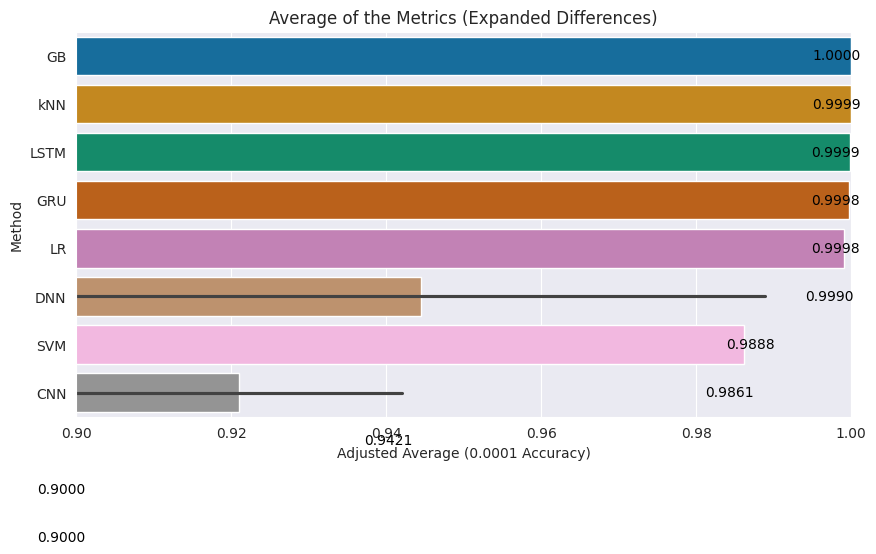

In [ ]:
results_sorted = results.sort_values(by="Average", ascending=False).copy()

results_sorted["Scaled_Average"] = np.interp(results_sorted["Average"],
                                             (results_sorted["Average"].min(), results_sorted["Average"].max()),
                                             (0.9000, 1.0000))  # Scaling between 0.9000 and 1.0000

sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Scaled_Average", y="Method", data=results_sorted, palette="colorblind")

plt.xlabel("Adjusted Average (0.0001 Accuracy)")
plt.ylabel("Method")
plt.title("Average of the Metrics (Expanded Differences)")

plt.xlim(0.9000, 1.0000)

for index, value in enumerate(results_sorted["Scaled_Average"]):
    plt.text(value - 0.005, index, f"{value:.4f}", color="black", va="center", fontsize=10)

plt.show()


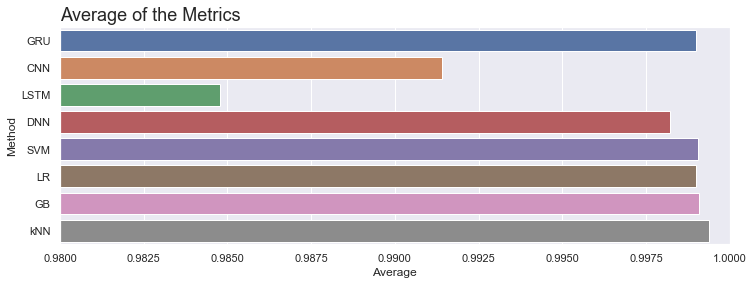

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=results, y='Method', x='Average')
ax.set(xlim=(0.98,1))
ax.set_title('Average of the Metrics', fontsize=18, loc='left')
ax.set_xticklabel()
ax = ax